# 1 Install and Import Dependencies

In [1]:
%pip install opencv-python imageio  matplotlib

  Using cached opencv_python-4.8.1.78-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (19 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.2/157.2 kB 10.3 MB/s eta 0:00:00
  Using cached pyparsing-3.1.1-py3-none-any.whl.metadata (5.1 kB)
  Using cached importlib_resources-6.1.1-py3-none-any.whl.metadata (4.1 kB)
Using cached opencv_python-4.8.1.78-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (61.7 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 69.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.1/301.1 kB 62.5 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 68.3 MB/s eta 0:00:00ta 0:00:01
Using cached importlib_resources-6.1.1-py3-none-any.whl (33 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 51.6 MB/s eta 0:00:00
Using cached pyparsing-3.1.1-py3-none-any.whl (1

In [2]:
%pip install matplotlib

/bin/bash: /home/ediss3/miniconda3/envs/lipnet/lib/python3.9/site-packages/cv2/../../../../lib/libtinfo.so.6: no version information available (required by /bin/bash)
  Using cached matplotlib-3.8.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.8 kB)
  Using cached contourpy-1.2.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.2/157.2 kB 6.2 MB/s eta 0:00:00
  Using cached kiwisolver-1.4.5-cp39-cp39-manylinux_2_12_x86_64.manylinux2010_x86_64.whl.metadata (6.4 kB)
  Using cached pyparsing-3.1.1-py3-none-any.whl.metadata (5.1 kB)
  Using cached importlib_resources-6.1.1-py3-none-any.whl.metadata (4.1 kB)
Using cached matplotlib-3.8.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.6 MB)
Using cached contourpy-1.2.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (310 kB)
Using cached cycler-0.12.1-py3-non

In [7]:
%pip install dlib imutils

  Using cached dlib-19.24.2-cp39-cp39-linux_x86_64.whl
  Using cached imutils-0.5.4-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [1]:
!wget 'http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2'

--2023-12-17 15:24:16--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  1.08MB/s    in 57s     

2023-12-17 15:25:13 (1.07 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]



In [2]:
!bzip2 -d 'shape_predictor_68_face_landmarks.dat.bz2'

In [1]:
import os, cv2
from matplotlib import pyplot as plt
import imageio
import numpy as np
import tensorflow as tf

In [2]:
tf.config.list_physical_devices('GPU')

[]

In [3]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

# 2 Build Data Loading Functions

In [4]:
import gdown

ModuleNotFoundError: No module named 'gdown'

In [13]:
# downloading the dataset
url = 'https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL'
output = '/ediss_data/ediss3/khizar/data.zip'
gdown.download(url,output, quiet=False)
gdown.extractall(output)

Downloading...
From (uriginal): https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL
From (redirected): https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL&confirm=t&uuid=392b3f6d-6e7a-487a-9647-cbacf0b96f18
To: /ediss_data/ediss3/khizar/data.zip
100%|██████████| 423M/423M [00:23<00:00, 18.4MB/s] 


['/ediss_data/ediss3/khizar/data/',
 '/ediss_data/ediss3/khizar/data/alignments/',
 '/ediss_data/ediss3/khizar/data/alignments/s1/',
 '/ediss_data/ediss3/khizar/data/alignments/s1/bbaf2n.align',
 '/ediss_data/ediss3/khizar/data/alignments/s1/bbaf3s.align',
 '/ediss_data/ediss3/khizar/data/alignments/s1/bbaf4p.align',
 '/ediss_data/ediss3/khizar/data/alignments/s1/bbaf5a.align',
 '/ediss_data/ediss3/khizar/data/alignments/s1/bbal6n.align',
 '/ediss_data/ediss3/khizar/data/alignments/s1/bbal7s.align',
 '/ediss_data/ediss3/khizar/data/alignments/s1/bbal8p.align',
 '/ediss_data/ediss3/khizar/data/alignments/s1/bbal9a.align',
 '/ediss_data/ediss3/khizar/data/alignments/s1/bbas1s.align',
 '/ediss_data/ediss3/khizar/data/alignments/s1/bbas2p.align',
 '/ediss_data/ediss3/khizar/data/alignments/s1/bbas3a.align',
 '/ediss_data/ediss3/khizar/data/alignments/s1/bbaszn.align',
 '/ediss_data/ediss3/khizar/data/alignments/s1/bbaz4n.align',
 '/ediss_data/ediss3/khizar/data/alignments/s1/bbaz5s.align',

In [7]:
from imutils import face_utils
import dlib

In [8]:

# initialize dlib's face detector (HOG-based) and then create
# the facial landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('./shape_predictor_68_face_landmarks.dat')

In [9]:
def get_roi(frame):
    faces = detector(frame)
    show = True
    fixed_size = (100, 50)  # width x height

    
    for face in faces:
        shape = predictor(frame, face)
        shape = face_utils.shape_to_np(shape)
        for (name, (i, j)) in face_utils.FACIAL_LANDMARKS_IDXS.items():
            if name == "mouth":
                # extract the ROI of the face region as a separate image
                (x, y, w, h) = cv2.boundingRect(np.array([shape[i:j]]))
                expansion_factor = 0.4  # e.g., 20% expansion
                new_w = int(w * (1 + expansion_factor))
                new_h = int(h * (1 + expansion_factor))
                
                # Adjust the top-left corner to compensate for the expansion
                new_x = max(x - int(w * expansion_factor / 2), 0)
                new_y = max(y - int(h * expansion_factor / 2), 0)

                # Ensure the expanded ROI doesn't exceed the frame boundaries
                new_x_end = min(new_x + new_w, frame.shape[1])
                new_y_end = min(new_y + new_h, frame.shape[0])

                roi = frame[new_y:new_y_end, new_x:new_x_end]
                if roi.size == 0: 
                  roi = frame[190:236,80:220]
                roi_resized = cv2.resize(roi, fixed_size)
                return roi_resized
    return cv2.resize(frame[190:236,80:220], fixed_size)
    

In [10]:
def load_video(path):
    cap = cv2.VideoCapture(path)
    frames = []
    for _ in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))):
        ret, frame = cap.read()
        frame = cv2.cvtColor(frame, cv2.COLOR_BGRA2GRAY)
        frames.append(tf.expand_dims(tf.image.convert_image_dtype(get_roi(frame), dtype=tf.uint8),-1))
    cap.release()
    
    mean = tf.math.reduce_mean(frames)
    std = tf.math.reduce_std(tf.cast(frames, tf.float32))
    return tf.cast((frames - mean), tf.float32) / std

In [11]:
vocab = [x for x in "abcdefghijklmnopqrstuvwxyz'?!123456789 "]

In [12]:
char_to_num = tf.keras.layers.StringLookup(vocabulary = vocab, oov_token = "")
num_to_char = tf.keras.layers.StringLookup(vocabulary = char_to_num.get_vocabulary(), oov_token="", invert=True)

print(
    f"The vocabulary is: {char_to_num.get_vocabulary()}"
    f"(size ={char_to_num.vocabulary_size()})"
)

The vocabulary is: ['', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', "'", '?', '!', '1', '2', '3', '4', '5', '6', '7', '8', '9', ' '](size =40)


In [13]:
def load_alignments(path):
    with open(path, 'r') as f:
        lines = f.readlines()
        tokens = []
        for line in lines:
            line = line.split()
            if line[2] != 'sil':
                tokens = [*tokens, ' ', line[2]]
        return char_to_num(tf.reshape(tf.strings.unicode_split(tokens, input_encoding='UTF-8'), (-1)))[1:]

In [18]:
def load_data(path):
    path = path.numpy().decode('UTF-8')
    file_name = os.path.splitext(os.path.basename(path))[0]
    video_path = os.path.join('data', 's1', f'{file_name}.mpg')
    alignment_path = os.path.join('data', 'alignments', 's1', f'{file_name}.align')
    frames = load_video(video_path)
    alignments = load_alignments(alignment_path)
    
    return frames, alignments

In [19]:
test_path = '/data/s1/bbaf2n.mpg'

In [20]:
frames, alignments = load_data(tf.convert_to_tensor(test_path))
frames[2]

<tf.Tensor: shape=(50, 100, 1), dtype=float32, numpy=
array([[[1.0411141 ],
        [1.0884374 ],
        [1.1830841 ],
        ...,
        [0.75717384],
        [0.8518206 ],
        [0.89914393]],

       [[1.0411141 ],
        [1.0884374 ],
        [1.1830841 ],
        ...,
        [0.75717384],
        [0.8518206 ],
        [0.89914393]],

       [[0.9937907 ],
        [1.0411141 ],
        [1.1357608 ],
        ...,
        [0.75717384],
        [0.89914393],
        [0.94646734]],

       ...,

       [[0.80449724],
        [0.8518206 ],
        [0.94646734],
        ...,
        [0.80449724],
        [0.80449724],
        [0.80449724]],

       [[0.8518206 ],
        [0.89914393],
        [1.0411141 ],
        ...,
        [0.8518206 ],
        [0.8518206 ],
        [0.8518206 ]],

       [[0.8518206 ],
        [0.89914393],
        [1.0411141 ],
        ...,
        [0.8518206 ],
        [0.8518206 ],
        [0.8518206 ]]], dtype=float32)>

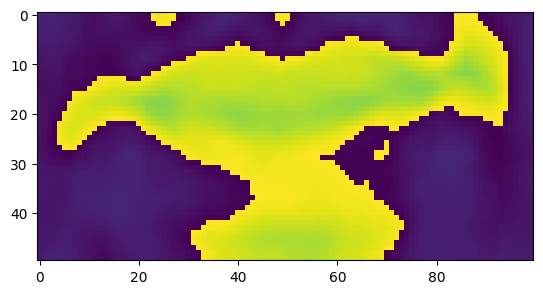

In [21]:
plt.imshow(frames[2])

In [22]:
def mappable_function(path):
    result = tf.py_function(load_data, [path], (tf.float32, tf.int64))
    return result

# 3 Create Data Pipeline

In [17]:
data = tf.data.Dataset.list_files('/ediss_data/ediss3/khizar/data/s1/*.mpg')
data = data.shuffle(500, reshuffle_each_iteration=False)
data = data.map(mappable_function)
data = data.padded_batch(2, padded_shapes=([75, None, None, None], [40]))
data = data.prefetch(tf.data.AUTOTUNE)
train = data.take(450)
test = data.skip(450)

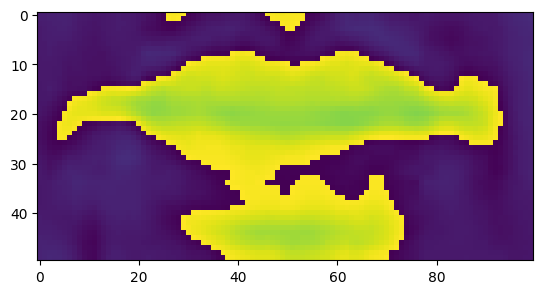

In [18]:
frames , alignments = data.as_numpy_iterator().next()
plt.imshow(frames[0][1])

In [19]:
from PIL import Image

imageio.mimsave('./animation.gif', tf.image.convert_image_dtype(tf.image.resize(tf.squeeze(frames[0],-1),(600,50)),dtype=tf.uint8), fps=20)

# 4 Building the Model

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, LSTM, Dense, Dropout, Bidirectional, MaxPool3D, Activation, Reshape, TimeDistributed, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler


In [24]:
model = Sequential()
model.add(Conv3D(128, 3, input_shape=(75,50,100,1), padding='same', activation='relu'))
model.add(MaxPool3D((1,2,2)))

model.add(Conv3D(256, 3, padding='same', activation='relu'))
model.add(MaxPool3D((1,2,2)))

model.add(Conv3D(75, 3, padding='same', activation='relu'))
model.add(MaxPool3D((1,2,2)))

model.add(TimeDistributed(Flatten()))

model.add(Bidirectional(LSTM(128, kernel_initializer='Orthogonal', return_sequences=True)))
model.add(Dropout(0.5))

model.add(Bidirectional(LSTM(128, kernel_initializer='Orthogonal', return_sequences=True)))
model.add(Dropout(0.5))

model.add(Dense(char_to_num.vocabulary_size()+1, kernel_initializer='he_normal', activation='softmax'))


In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_3 (Conv3D)           (None, 75, 50, 100, 128   3584      
                             )                                   
                                                                 
 max_pooling3d_3 (MaxPoolin  (None, 75, 25, 50, 128)   0         
 g3D)                                                            
                                                                 
 conv3d_4 (Conv3D)           (None, 75, 25, 50, 256)   884992    
                                                                 
 max_pooling3d_4 (MaxPoolin  (None, 75, 12, 25, 256)   0         
 g3D)                                                            
                                                                 
 conv3d_5 (Conv3D)           (None, 75, 12, 25, 75)    518475    
                                                      

In [23]:
val = data.as_numpy_iterator().next()

In [24]:
yhat = model.predict(val[0])

2023-12-19 17:29:10.418665: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904


1/1 [==============================] - 7s 7s/step


In [25]:
tf.strings.reduce_join([num_to_char(tf.argmax(x)) for x in yhat[0]])

<tf.Tensor: shape=(), dtype=string, numpy=b'mfffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffff'>

# 5 Train the Model

In [26]:
def scheduler(epoch, lr):
    if epoch < 30:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

In [27]:
def CTCLoss(y_true, y_pred):
    batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
    input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
    label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")
    
    input_length = input_length * tf.ones(shape=(batch_len,1), dtype="int64")
    label_length = label_length * tf.ones(shape=(batch_len,1), dtype="int64")
    
    loss = tf.keras.backend.ctc_batch_cost(y_true, y_pred, input_length, label_length)
    return loss

In [28]:
class ProduceExample(tf.keras.callbacks.Callback):
    def __init__(self, dataset) -> None:
        self.dataset = dataset.as_numpy_iterator()
        
    def on_epoch_end(self, epoch, logs=None) -> None:
        data = self.dataset.next()
        yhat = self.model.predict(data[0])
        decoded = tf.keras.backend.ctc_decode(yhat, [75,75], greedy=False)[0][0].numpy()
        for x in range(len(yhat)):           
            print('Original:', tf.strings.reduce_join(num_to_char(data[1][x])).numpy().decode('utf-8'))
            print('Prediction:', tf.strings.reduce_join(num_to_char(decoded[x])).numpy().decode('utf-8'))
            print('~'*100)


In [29]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss=CTCLoss)

In [30]:
checkpoint_callback = ModelCheckpoint(os.path.join('models','checkpoint'), monitor='loss', save_weights_only=True) 

In [31]:
schedule_callback = LearningRateScheduler(scheduler)

In [32]:
example_callback = ProduceExample(data)

In [33]:
model.fit(train, validation_data=test, epochs=2, callbacks=[checkpoint_callback, schedule_callback, example_callback])

Epoch 1/2


In [30]:
model.load_weights("./models/checkpoint")

In [31]:
sample = load_data(tf.convert_to_tensor('/data/s1/bras9a.mpg'))

In [32]:


print('~'*100, 'REAL TEXT')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in [sample[1]]]



~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ REAL TEXT


[<tf.Tensor: shape=(), dtype=string, numpy=b'bin red at s nine again'>]

In [33]:
yhat = model.predict(tf.expand_dims(sample[0], axis=0))

1/1 [==============================] - 2s 2s/step


In [34]:
decoded = tf.keras.backend.ctc_decode(yhat, input_length=[75], greedy=True)[0][0].numpy()

In [35]:
print('~'*100, 'PREDICTIONS')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in decoded]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ PREDICTIONS


[<tf.Tensor: shape=(), dtype=string, numpy=b'bin red at nine again'>]